In [1]:
import sys
sys.path.append('/home/micah/Research')
import cp_analyzer as cp
import json
from matplotlib import pyplot as plt
import numpy as np
import cp_analyzer.quadrotor.log_linearized

file = '/home/micah/example/drone_specs.json'
with open(file, 'r') as file:
    # Load the data from the JSON file
    quadrotor = json.load(file)
# cp.quadrotor.log_linearized.disturbance(quadrotor, ax1)
ref = cp_analyzer.sim.multirotor_plan.traj_3()

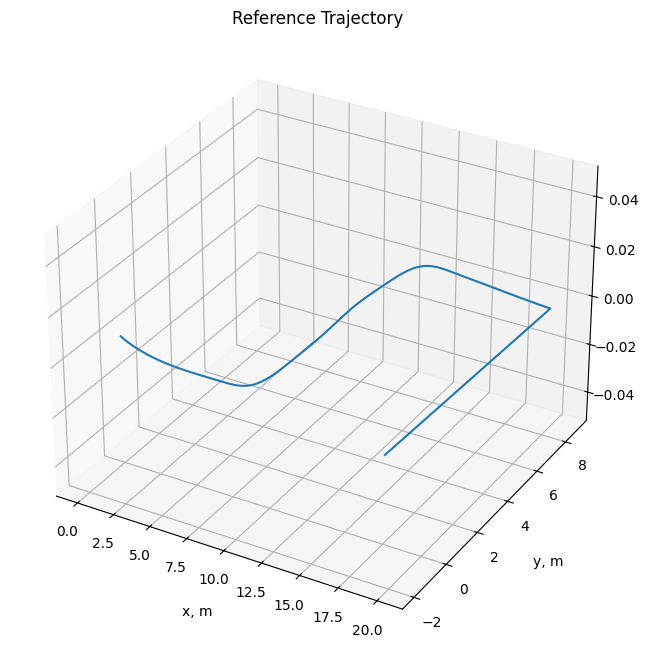

In [3]:
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(111, projection="3d")
cp_analyzer.sim.multirotor_plan.plot_trajectory3D(ref, axis)

In [3]:
inv_points, mu_total, points, points_theta, ebeta, omegabound, sol_LMI = cp_analyzer.quadrotor.log_linearized.disturbance(quadrotor, ref)

0.7589466389696109
finding invariant set


In [4]:
print(inv_points)

[[-0.01839769  0.19920693  0.42621279 ... -0.01839769 -0.01839769
  -0.01839769]
 [ 1.96301508  1.9864553   1.96597687 ...  1.96301508  1.96301508
   1.96301508]
 [ 0.40226984  0.26053279  0.12529065 ...  0.40226984  0.40226984
   0.40226984]
 [-0.11303469 -0.10775444 -0.09039712 ... -0.11303469 -0.11303469
  -0.11303469]
 [-0.7435695  -0.79935166 -0.84725001 ... -0.7435695  -0.7435695
  -0.7435695 ]
 [ 0.48087764  0.37539634  0.25815371 ...  0.48087764  0.48087764
   0.48087764]]


In [8]:
def plot2DInvSet(points, inv_points):
    plt.figure(figsize=(14,7))
    plt.rcParams.update({'font.size': 12})
    ax1 = plt.subplot(121)
    ax1.plot(points[0, :], points[1, :], 'g', label='with Dynamic Inversion')
    ax1.set_xlabel('$\\zeta_x$, m')
    ax1.set_ylabel('$\\zeta_y$, m')

    plt.axis('equal')
    plt.grid(True)
    
    ax2 = plt.subplot(122)
    ax2.plot(inv_points[0, :-1], inv_points[1, :-1], 'g', label='with Dynamic Inversion')
    
    ax2.set_xlabel('$\\eta_x$, m')
    ax2.set_ylabel('$\\eta_y$, m')
    plt.grid(True)

    plt.axis('equal')
    plt.tight_layout()
    ax1.set_title('Invariant Set in Lie Algebra', fontsize=20)
    ax2.set_title('Invariant Set in Lie Group', fontsize=20)


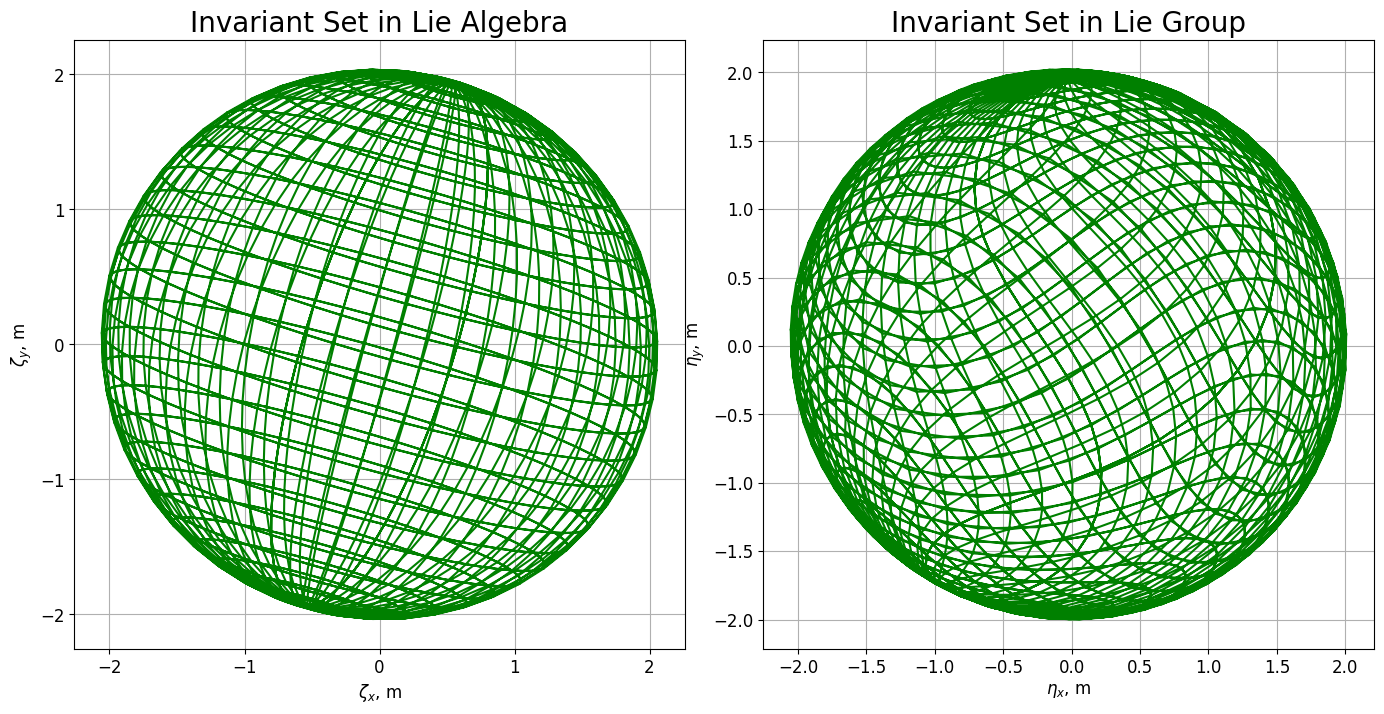

In [9]:
plot2DInvSet(points,inv_points)

In [11]:
def plot3DInvSet(points, inv_points):
    plt.figure(figsize=(14,7))
    ax1 = plt.subplot(121, projection='3d', proj_type='ortho', elev=40, azim=20)
    ax1.plot3D(points[0, :], points[1, :], points[2, :],'g', label='with Dynamic Inversion')
    ax1.set_xlabel('$\\zeta_x$, m')
    ax1.set_ylabel('$\\zeta_y$, m')
    ax1.set_zlabel('$\\zeta_z$, rad', labelpad=1)
    ax1.set_title('Invariant Set in Lie Algebra', fontsize=20)

    plt.axis('auto')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    ax2 = plt.subplot(122, projection='3d', proj_type='ortho', elev=40, azim=20)

    ax2.plot3D(inv_points[0, :], inv_points[1, :], inv_points[2, :], 'g', label='with Dynamic Inversion')

    ax2.set_xlabel('$\\eta_x$, m')
    ax2.set_ylabel('$\\eta_y$, m')
    ax2.set_zlabel('$\\eta_z$, rad')
    ax2.set_title('Invariant Set in Lie Group', fontsize=20)
    plt.axis('auto')
    plt.subplots_adjust(left=0.45, right=1, top=0.5, bottom=0.08)

    plt.tight_layout()

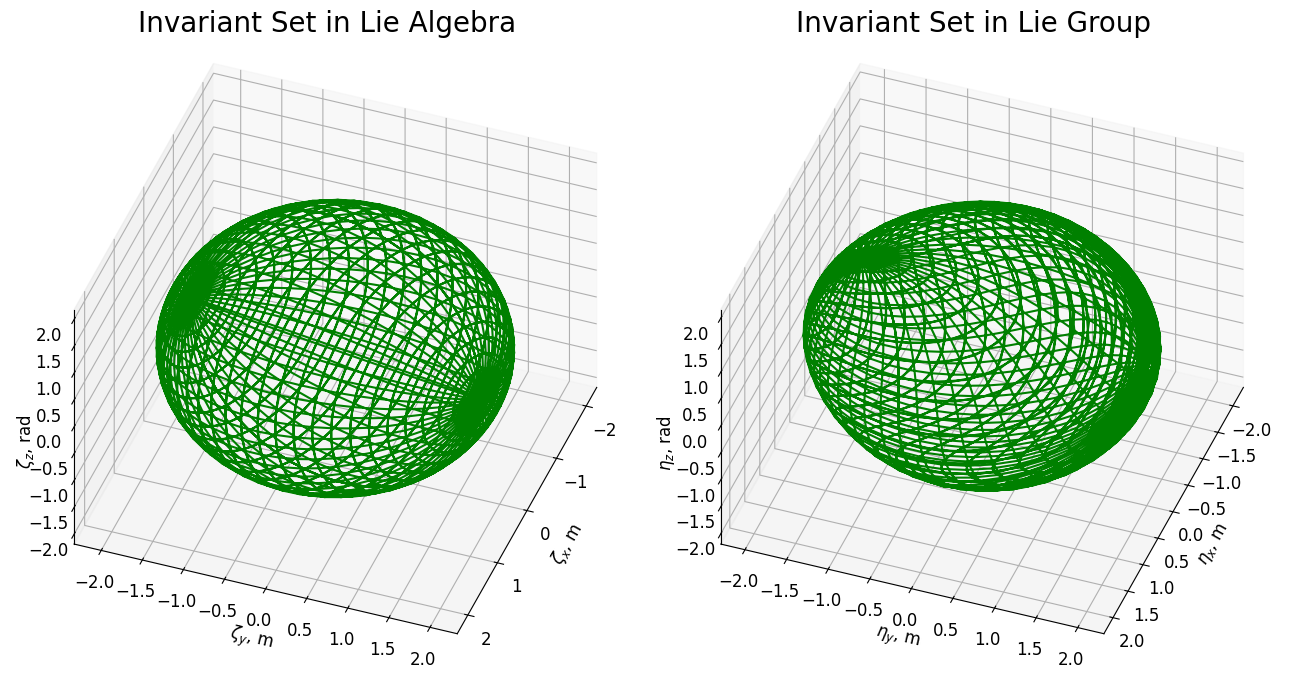

In [13]:
plot3DInvSet(points, inv_points)

In [ ]:
def plot_hull(ref, num_pipes, ebeta, w1, omegabound, sol_LMI, 'xy')
    # Calculate convex hull for flow pipes
    flowpipes_traj, intervalhull_traj, nom_traj, t_vect = flowpipe.flowpipes(ref, num_pipes, ebeta, w1, omegabound, sol_LMI, 'xy')
    plt.savefig('fig/interval_hull.png')
    plt.close()
    
    print("plotting flow pipes")
    print(datetime.datetime.now())
    print('plotting flow pipes')
    flowpipe.plot_flowpipes(nom_traj, flowpipes_traj, num_pipes, 'xy')
    plt.savefig('fig/flow_pipes.png')
    # plt.savefig("/home/micah/example/flow_pipes.png")
    plt.close()
    
    print('plotting sim')
    print(datetime.datetime.now())
    mr_control.plot_sim(ref, w1, omegabound, flowpipes_traj, n, 'xy')
    print("done plotting sim")
    print(datetime.datetime.now())
    # print('plotting time history')
    # plot_timehis(sol_LMI, ref, w1, w2, 40, ebeta)